# Pymaceuticals Inc.
---

### Analysis

- This analysis raises more questions than it answers, but mice given either Capomulin or Ramicane survived the entire study. 
- Mouse ID l509 was given Capomulin, and his tumor did shrink.
- This study started with 124 female mice and 125 male mice. One female (g989) had to be removed due to duplicate results, leaving them with 123 females, still almost a 50/50 split; however, each individual drug regimen was given a random sampling, meaning some regimens treated a disproportionate number of males or females in their trials. More care should be taken in the future to ensure reliable results. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4800017/)
- The age and weight of each participant was also not accounted for, despite the fact that the final 2 scatter plots in this challenge confirm that larger mice typically have larger tumors.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [23]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = merge_df['Mouse ID'].loc[merge_df[['Mouse ID', 'Timepoint']].duplicated()].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = merge_df.loc[merge_df["Mouse ID"].isin(duplicated_mouse)==True]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df.drop(duplicated_data.index)
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [27]:
# Checking the number of mice in the clean DataFrame.
merge_df['Mouse ID'].nunique()

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means_tumor = merge_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians_tumor = merge_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances_tumor = merge_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stds_tumor = merge_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems_tumor = merge_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
summary_tumor = pd.DataFrame({'Mean Tumor Volume': means_tumor,
                                   'Median Tumor Volume': medians_tumor,                               
                                   'Tumor Volume Variance': variances_tumor,
                                   'Tumor Volume Std. Dev.': stds_tumor,
                                   'Tumor Volume Std. Err.':sems_tumor})
summary_tumor

C:\Users\dale\AppData\Local\Temp\ipykernel_3504\1027894983.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_tumor = merge_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
C:\Users\dale\AppData\Local\Temp\ipykernel_3504\1027894983.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians_tumor = merge_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
C:\Users\dale\AppData\Local\Temp\ipykernel_3504\1027894983.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
merge_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

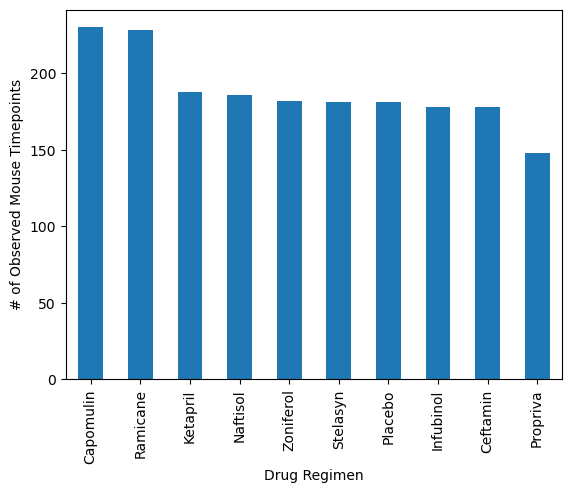

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = merge_df['Drug Regimen'].value_counts()
drug_regimen.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

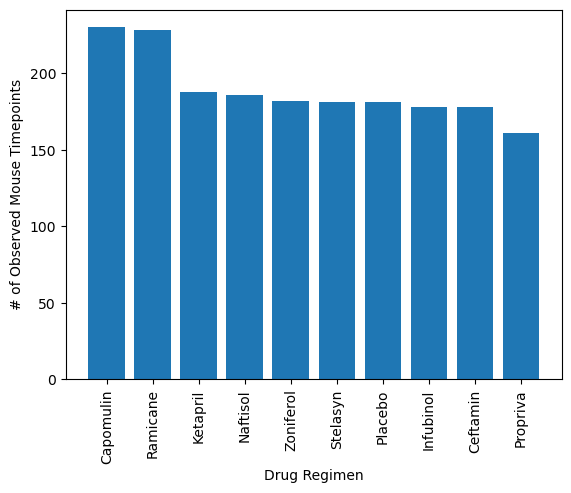

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = merge_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

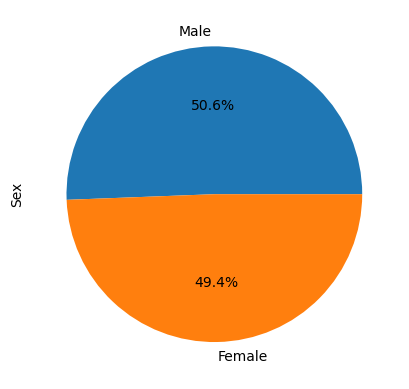

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merge_df = pd.merge(mouse_metadata, study_results,
                                 how='right', on='Mouse ID')

sex_mouse = merge_df['Sex'].value_counts()
labels = ["Male", "Female"]
autopct = "%1.1f%%"
plt.ylabel("Sex")

plt.pie(sex_mouse, labels=labels, autopct=autopct)
plt.show()

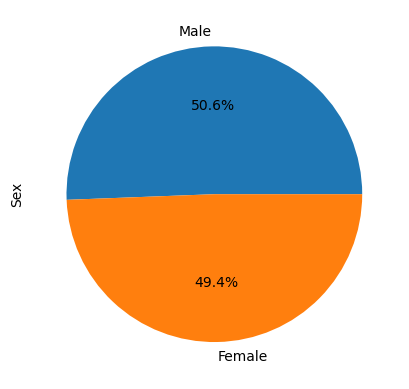

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(merge_df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ftime = merge_df.groupby(['Mouse ID'])['Timepoint'].max()
ftime_df = pd.DataFrame(ftime)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
stats_df = pd.merge(merge_df, ftime_df, on=('Mouse ID', 'Timepoint'), how="right")
stats_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments: 
    volume_df = stats_df.loc[stats_df['Drug Regimen'] == i,'Tumor Volume (mm3)']
    volume_q = volume_df.quantile([.25, .75])
    lo_q = volume_q[.25]
    hi_q = volume_q[.75]
    iqr=hi_q-lo_q
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatments_df = stats_df.loc[stats_df['Drug Regimen'].isin(treatments)]  
    
    # add subset 
    outliers = volume_df.loc[(volume_df<(lo_q-1.5*iqr))|(volume_df>(hi_q+1.5*iqr))]
    tumor_data.append(volume_df)
    
    # Determine outliers using upper and lower bounds
    print(f"{i}'s potential outliers: {outliers}") 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


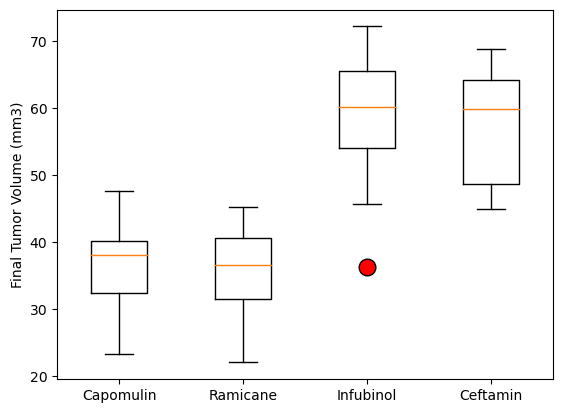

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels = treatments, flierprops={'markerfacecolor':'red', 'markeredgecolor':'black', 'markersize':'12'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

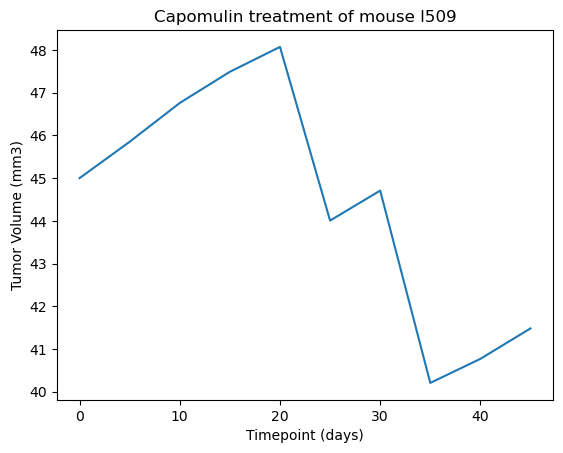

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Set the variables for Capomulin treatment of mouse l509
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin"]
mouse_plot = capomulin_df.loc[capomulin_df['Mouse ID']=="l509"]
x = mouse_plot['Timepoint']
y = mouse_plot['Tumor Volume (mm3)']

# Create the title and the labels
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")

# Plot the line graph
plt.plot(x, y)

# Show the plot
plt.show()

C:\Users\dale\AppData\Local\Temp\ipykernel_3504\3127502221.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = capomulin_df.groupby('Mouse ID').mean()


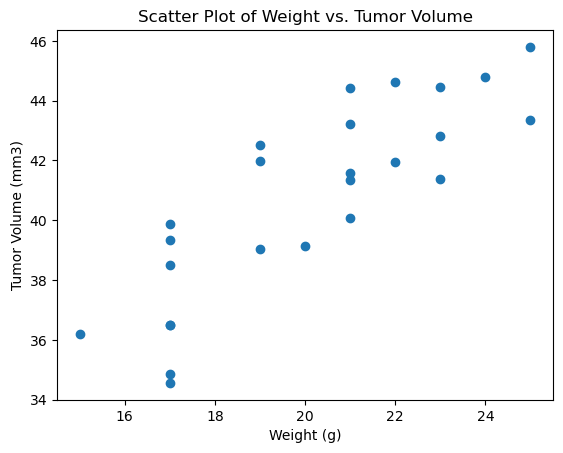

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the data by 'Mouse ID' and calculate the means
grouped_data = capomulin_df.groupby('Mouse ID').mean()

# Get the average weight and tumor volume
x = grouped_data['Weight (g)']
y = grouped_data['Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Scatter Plot of Weight vs. Tumor Volume')
plt.show()

## Correlation and Regression

C:\Users\dale\AppData\Local\Temp\ipykernel_3504\1375364653.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = capomulin_df.groupby('Mouse ID').mean()


The r-squared is: 0.7088568047708727


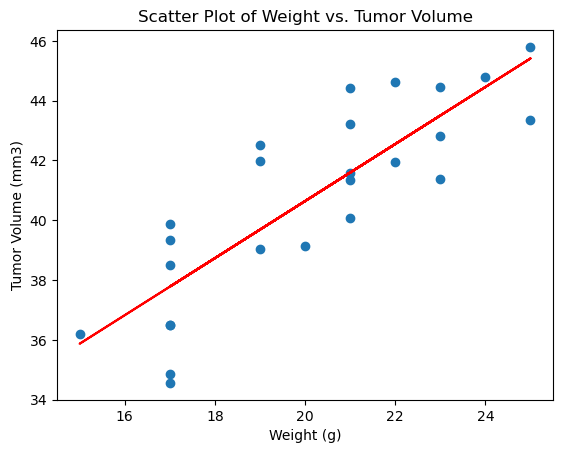

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Group the data by 'Mouse ID' and calculate the means
grouped_data = capomulin_df.groupby('Mouse ID').mean()

# Get the average weight and tumor volume
x = grouped_data['Weight (g)']
y = grouped_data['Tumor Volume (mm3)']

# Regress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")

# Create the scatter plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Scatter Plot of Weight vs. Tumor Volume')
plt.show()